In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [2]:
data=sns.load_dataset('iris')

In [3]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [4]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
X=data.drop('species', axis=1)

In [6]:
X.loc[3]

sepal_length    4.6
sepal_width     3.1
petal_length    1.5
petal_width     0.2
Name: 3, dtype: float64

In [7]:
Y=data.species

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
label=LabelEncoder()

In [10]:
Y= label.fit_transform(Y)

In [11]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

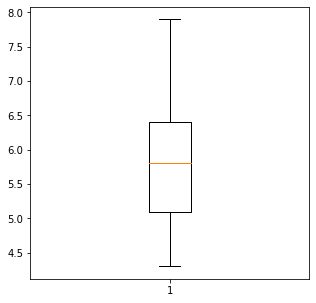

In [12]:
plt.figure(figsize=(5,5))
plt.boxplot(X.sepal_length)
plt.show()


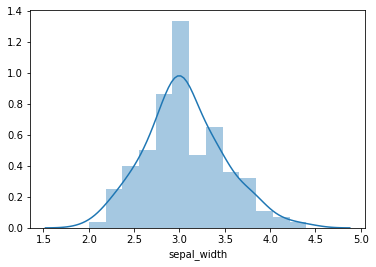

In [13]:
sns.distplot(X.sepal_width)

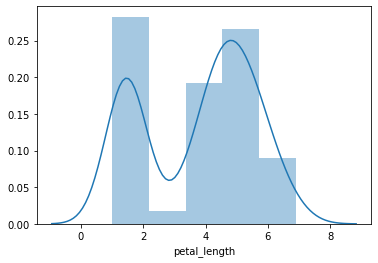

In [14]:
sns.distplot(X.petal_length)

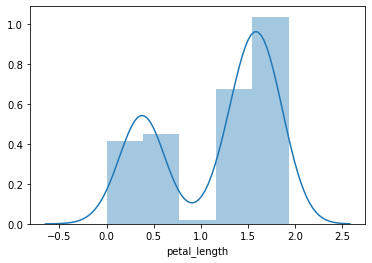

In [15]:
sns.distplot(np.log(X.petal_length))

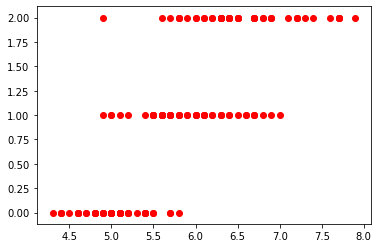

In [16]:
plt.scatter(X.sepal_length,Y, color='r')


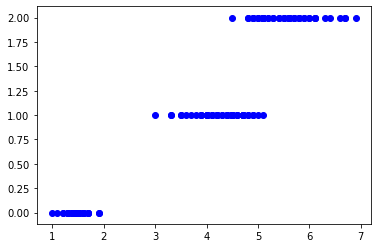

In [17]:
plt.scatter(X.petal_length,Y,color='b')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x13FA9E90>,
      dtype=object)

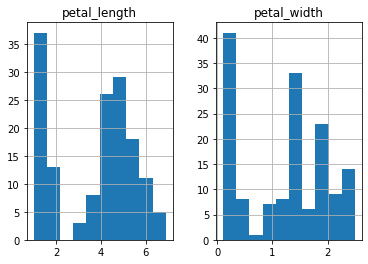

In [18]:
Viz=X[['petal_length','petal_width']]
Viz.hist()

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

In [21]:
X_train.shape

(105, 4)

In [22]:
Y_train.shape

(105,)

In [23]:
X_test.shape

(45, 4)

In [24]:
Y_test.shape

(45,)

In [25]:
from sklearn.linear_model import SGDClassifier
Sgd=SGDClassifier(max_iter=250, tol=1e-2, random_state=55)

In [26]:
Sgd.fit(X_train,Y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=250, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=55, shuffle=True, tol=0.01,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [27]:
Sgd.score(X_train,Y_train)

0.9238095238095239

In [28]:
Sgd.score(X_test,Y_test)

1.0

In [44]:
from sklearn.model_selection import StratifiedKFold
sk = StratifiedKFold(n_splits=3,shuffle=True,random_state=54)

In [45]:
X_train.iloc[10]

sepal_length    5.8
sepal_width     2.7
petal_length    4.1
petal_width     1.0
Name: 67, dtype: float64

In [46]:
for train_index,test_index in sk.split(X_train,Y_train):
    X_train_folds = X_train.iloc[train_index]
    Y_train_folds = Y_train[train_index]
    X_test_fold = X_train.iloc[test_index]
    Y_test_fold = Y_train[test_index]
    Sgd.fit(X_train_folds, Y_train_folds)
    Y_pred = Sgd.predict(X_test_fold)
    n_correct = sum(Y_pred == Y_test_fold)
    print(n_correct / len(Y_pred))
    

0.9428571428571428
0.7142857142857143
0.9142857142857143
